# Ensemble

A group of predictors is called an ensemble.

This technique is called Ensemble Learning, and an Ensemble Learning algorithm is called an Ensemble method.

### Methond: 

Voting Classifier

Suppose you have trained a few classifiers, each one achieving about 80% accuracy. You may have a Logistic Regression classifier, an SVM classifier, a Random Forest classifier, a K-Nearest Neighbors classifier, and perhaps a few more.

A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes. This majority-vote classi‐ fier is called a hard voting classifier.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
data = pd.read_csv('FEV.csv') 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      654 non-null    int64  
 1   Age     654 non-null    int64  
 2   FEV     654 non-null    float64
 3   Hgt     654 non-null    float64
 4   Sex     654 non-null    int64  
 5   Smoke   654 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 30.8 KB


In [7]:
data.describe()

,Id,Age,FEV,Hgt,Sex,Smoke
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,37169.571865,9.931193,2.636780,61.143578,0.513761,0.099388
std,23690.860350,2.953935,0.867059,5.703513,0.500193,0.299412
min,201.000000,3.000000,0.791000,46.000000,0.000000,0.000000
25%,15811.000000,8.000000,1.981000,57.000000,0.000000,0.000000
50%,36071.000000,10.000000,2.547500,61.500000,1.000000,0.000000
75%,53638.500000,12.000000,3.118500,65.500000,1.000000,0.000000
max,90001.000000,19.000000,5.793000,74.000000,1.000000,1.000000


In [8]:
data.head()

,Id,Age,FEV,Hgt,Sex,Smoke
0,301,9,1.708,57.0,0,0
1,451,8,1.724,67.5,0,0
2,501,7,1.720,54.5,0,0
3,642,9,1.558,53.0,1,0
4,901,9,1.895,57.0,1,0


In [10]:
#checking standard deviation
print(data.std()) 

Id       23690.860350
Age          2.953935
FEV          0.867059
Hgt          5.703513
Sex          0.500193
Smoke        0.299412
dtype: float64


<Figure size 600x400 with 0 Axes>

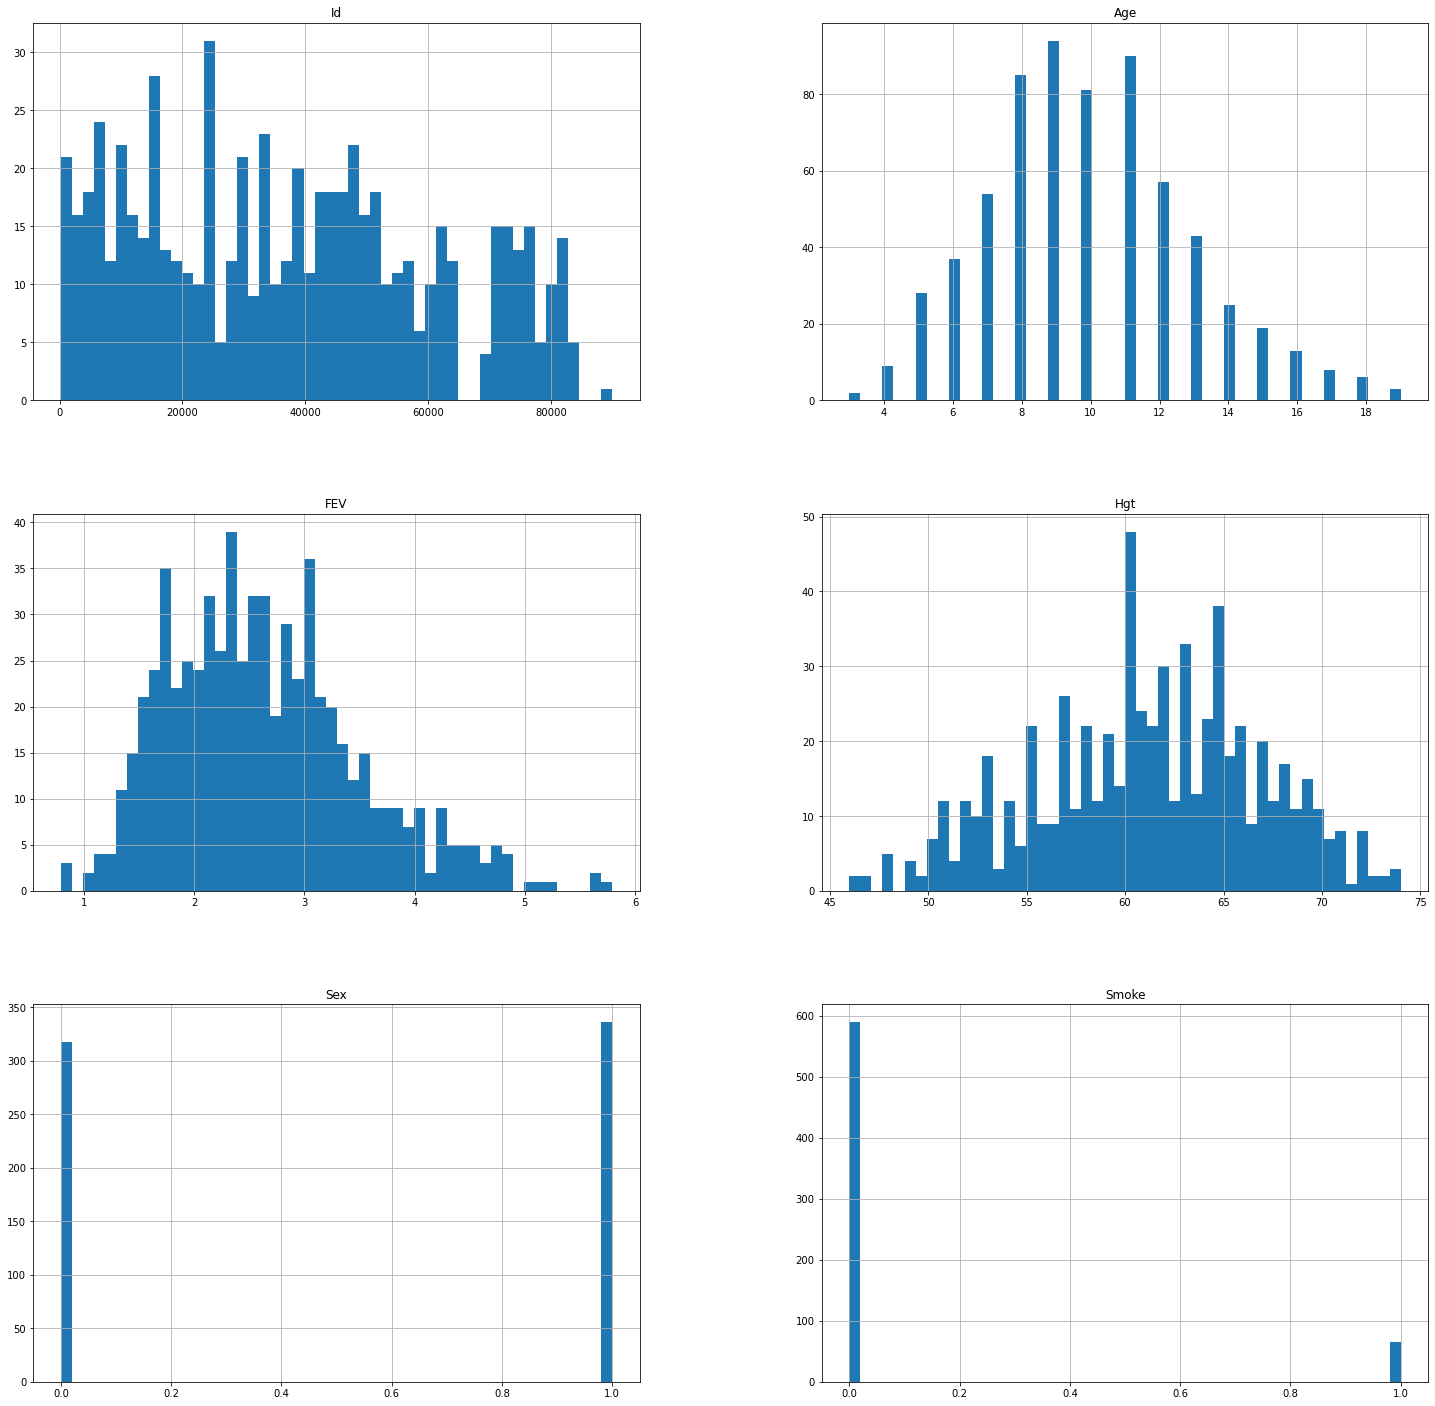

In [11]:
# plot all of the columns 
plt.figure(dpi=100)
data.hist(bins=50, figsize=(25,25))
plt.show()

Sex and Smoke are dummy variables: 

In [13]:
data.isnull().count()

Id       654
Age      654
FEV      654
Hgt      654
Sex      654
Smoke    654
dtype: int64

In [14]:
data.isna().sum()

Id       0
Age      0
FEV      0
Hgt      0
Sex      0
Smoke    0
dtype: int64

/Users/lly/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

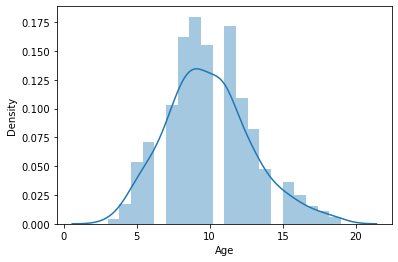

In [16]:
sns.distplot(data['Age'], bins=20)

/Users/lly/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FEV', ylabel='Density'>

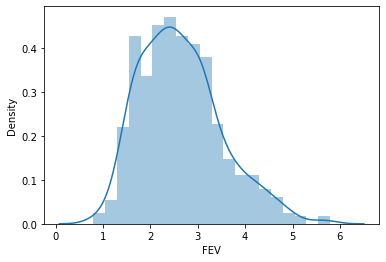

In [17]:
sns.distplot(data['FEV'], bins=20)

/Users/lly/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hgt', ylabel='Density'>

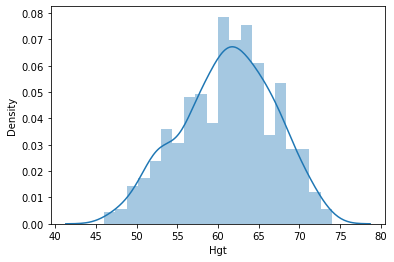

In [18]:
sns.distplot(data['Hgt'], bins=20)

/Users/lly/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


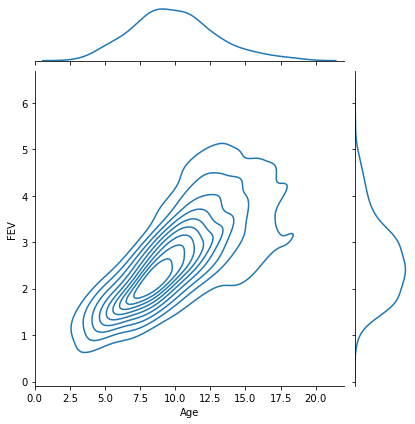

In [20]:
sns.jointplot(data['Age'], data['FEV'], kind= 'kde')

/Users/lly/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


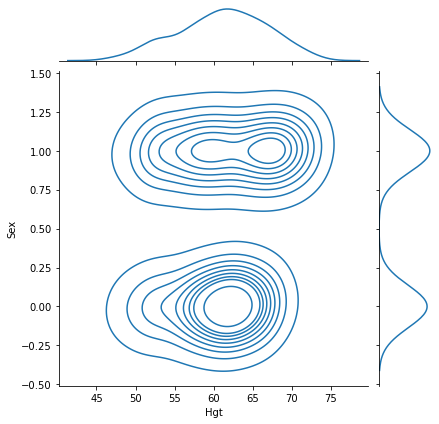

In [21]:
sns.jointplot(data['Hgt'], data['Sex'], kind= 'kde')

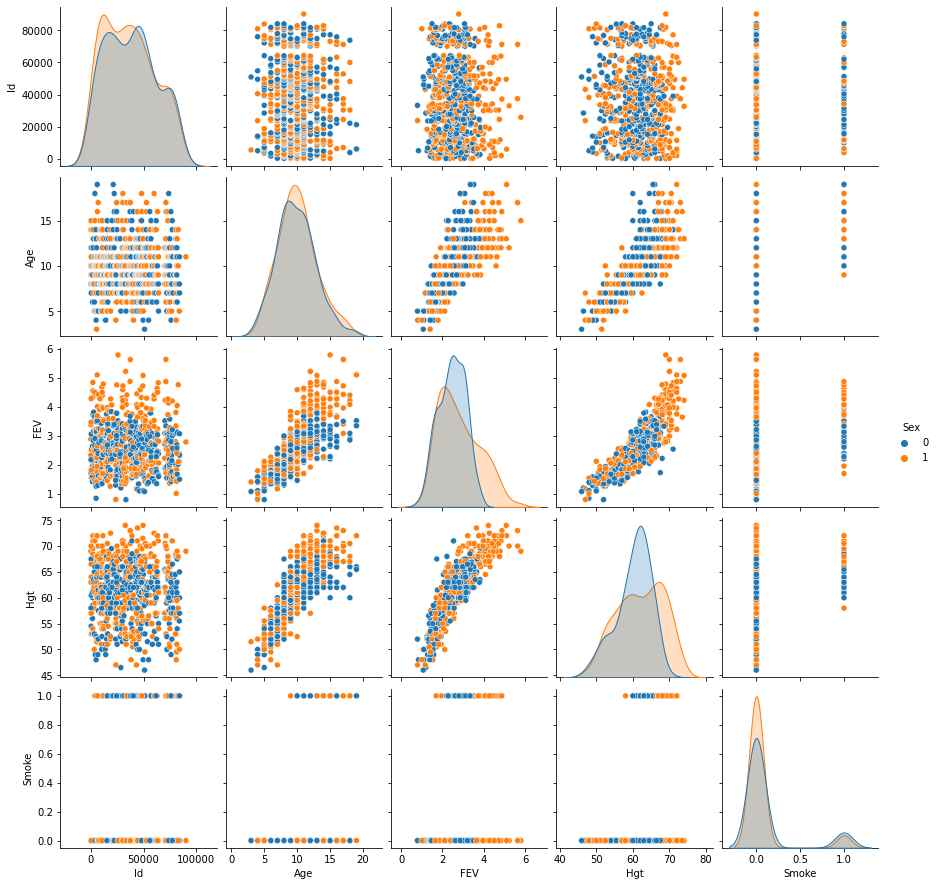

In [22]:
sns.pairplot(data, hue='Sex')

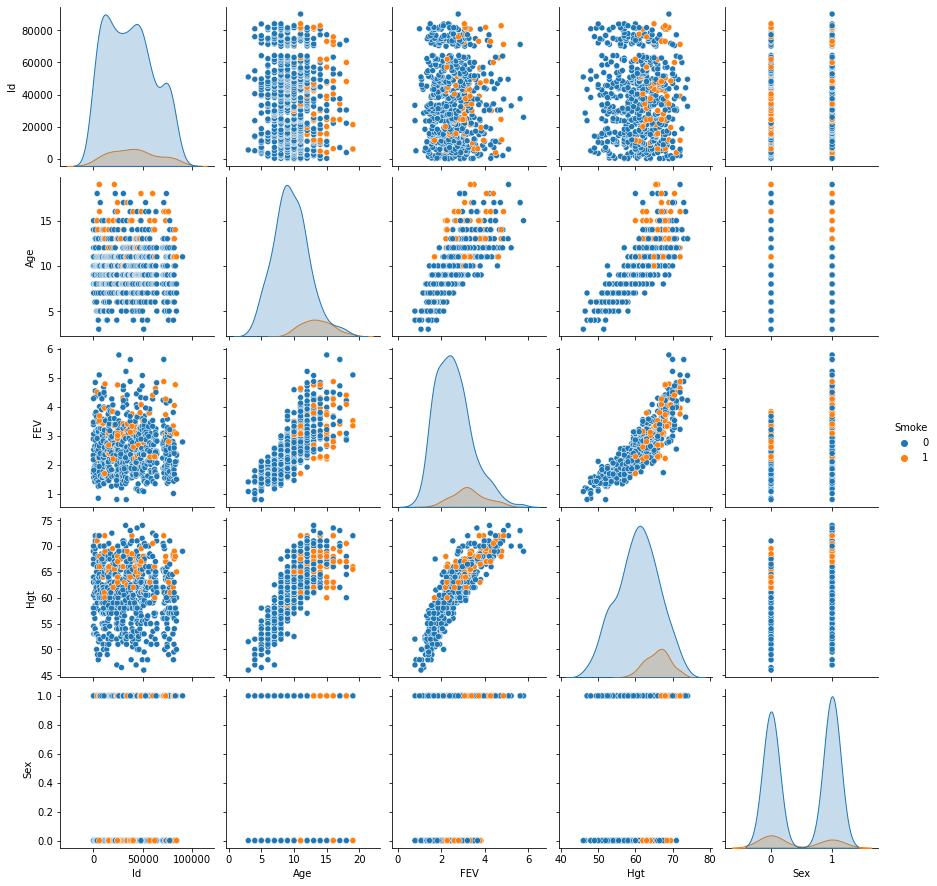

In [23]:
sns.pairplot(data, hue='Smoke')

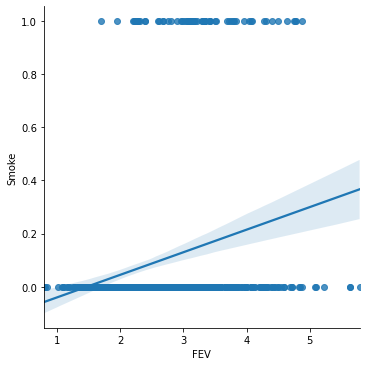

In [25]:
sns.lmplot(x="FEV", y="Smoke", data=data)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [17]:
X = data[['Age', 'FEV']]
y = data['Smoke']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [26]:
#test accuracy
print ("Train - Accuracy :", metrics.accuracy_score(y_train,logistic.predict(X_train)))

Train - Accuracy : 0.8979591836734694


### AdaBoost

With AdaBoost, the training algorithm first trains a base classifier and uses it to make predictions on the training set. Then, each of the missclassified training instances is then given a relative weight. The next classifier is then trained on the dataset using these relative weights, and so on.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), n_estimators = 10,algorithm = "SAMME.R", learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"AdaBoost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       239
           1       0.67      0.09      0.15        23

    accuracy                           0.92       262
   macro avg       0.79      0.54      0.55       262
weighted avg       0.90      0.92      0.89       262
 



### Gradient Boosting

Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees. When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest. A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function.

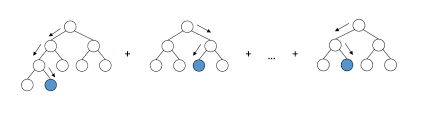

In [21]:
X = data[["Age", "FEV", "Hgt"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       239
           1       1.00      0.04      0.08        23

    accuracy                           0.92       262
   macro avg       0.96      0.52      0.52       262
weighted avg       0.92      0.92      0.88       262
 



In [30]:
y_pred = logistic.predict(X_test)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
cr = classification_report(y_test, y_pred,target_names=['0','1'])
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       239
           1       0.43      0.26      0.32        23

    accuracy                           0.90       262
   macro avg       0.68      0.61      0.64       262
weighted avg       0.89      0.90      0.89       262



In [33]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
voting_clf = VotingClassifier([('lr', logistic),
                              ('rf', rf),
                              ('dt', dt)], voting = 'hard')

In [35]:
from sklearn.metrics import accuracy_score
for clf in [logistic, rf, dt, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred_clf = clf.predict (X_test)
    print (f' {clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred_clf)}')

 LogisticRegression, accuracy score = 0.9045801526717557
 RandomForestClassifier, accuracy score = 0.9083969465648855
 DecisionTreeClassifier, accuracy score = 0.8587786259541985
 VotingClassifier, accuracy score = 0.9083969465648855
